# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [1]:
# conda install -c conda-forge ta-lib

In [2]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_date = dt.datetime(2018, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'X'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
2018-03-01  45.380001  47.639999  43.720001  46.009998  44.349823  40853400
2018-03-02  45.000000  45.779999  43.220001  45.389999  43.752201  21324600
2018-03-05  44.520000  45.869999  44.279999  44.750000  43.135288  13108300
2018-03-06  44.770000  45.040001  43.500000  44.529999  42.923233  13044100
2018-03-07  44.910000  47.360001  44.849998  45.689999  44.041367  18947400
...               ...        ...        ...        ...        ...       ...
2023-02-22  28.190001  28.760000  27.850000  28.389999  28.389999   6335000
2023-02-23  28.570000  28.750000  27.799999  28.309999  28.309999   4881100
2023-02-24  27.570000  28.309999  27.400000  28.270000  28.270000   5297700
2023-02-27  28.420000  29.370001  28.420000  28.910000  28.910000   6213700
2023-02-28  29.180000  30.850000  28.969999  30.629999  30.629999   9773400

[1258 rows x 6 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2018-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8+ KB


In [6]:
data.describe().applymap("{0:.5f}".format).T

count            mean            std            min  \
Open       1258.00000        20.74141        8.85782        4.80000   
High       1258.00000        21.24075        9.01655        5.34000   
Low        1258.00000        20.25417        8.67531        4.54000   
Close      1258.00000        20.72793        8.83719        4.90000   
Adj Close  1258.00000        20.34398        8.61267        4.81437   
Volume     1258.00000  14103387.75835  7985273.79768  3316900.00000   

                     25%             50%             75%             max  
Open            13.27250        21.56500        26.27500        45.72000  
High            13.63000        22.19500        26.83000        47.64000  
Low             12.97750        21.02500        25.67750        44.85000  
Close           13.27250        21.54000        26.26750        46.01000  
Adj Close       12.93875        21.28717        25.95326        44.34982  
Volume     8579700.00000  12105800.00000  17331750.00000  80060000.00000

#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [7]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

Open       High        Low      Close  Adj Close   Volume  \
2023-02-22  28.190001  28.760000  27.850000  28.389999  28.389999  6335000   
2023-02-23  28.570000  28.750000  27.799999  28.309999  28.309999  4881100   
2023-02-24  27.570000  28.309999  27.400000  28.270000  28.270000  5297700   
2023-02-27  28.420000  29.370001  28.420000  28.910000  28.910000  6213700   
2023-02-28  29.180000  30.850000  28.969999  30.629999  30.629999  9773400   

                 30MA     50MA     200MA    EMA_0.3  
2023-02-22  28.581667  27.3426  23.40480  28.622404  
2023-02-23  28.602333  27.4006  23.41025  28.528682  
2023-02-24  28.626000  27.4498  23.42210  28.451078  
2023-02-27  28.630667  27.5126  23.43895  28.588754  
2023-02-28  28.706667  27.6340  23.46850  29.201128

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

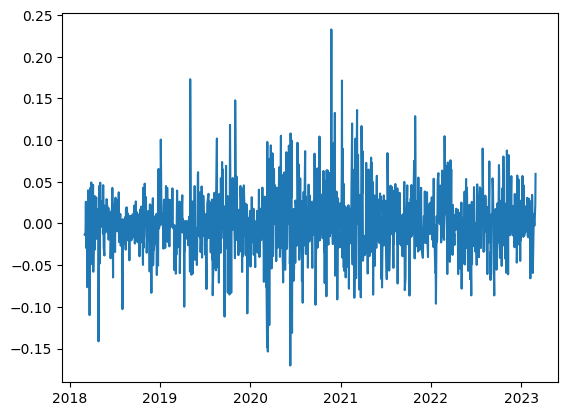

In [9]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

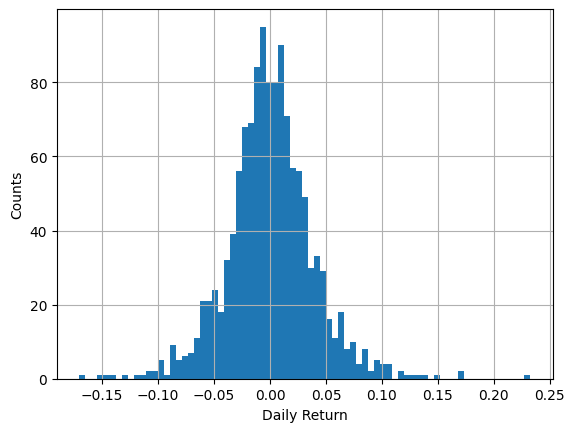

In [10]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [11]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

Close
2018-03-31  39.884285
2018-04-30  35.698096
2018-05-31  35.321818
2018-06-30  36.290000
2018-07-31  36.432857
2018-08-31  30.805217
2018-09-30  29.404210
2018-10-31  27.884783
2018-11-30  26.560952
2018-12-31  19.885263

In [12]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

Close  Year      Month  dayofweek  quarter
2018-03-31  39.884285  2018      March   Saturday        1
2018-04-30  35.698096  2018      April     Monday        2
2018-05-31  35.321818  2018        May   Thursday        2
2018-06-30  36.290000  2018       June   Saturday        2
2018-07-31  36.432857  2018       July    Tuesday        3
2018-08-31  30.805217  2018     August     Friday        3
2018-09-30  29.404210  2018  September     Sunday        3
2018-10-31  27.884783  2018    October  Wednesday        4
2018-11-30  26.560952  2018   November     Friday        4
2018-12-31  19.885263  2018   December     Monday        4

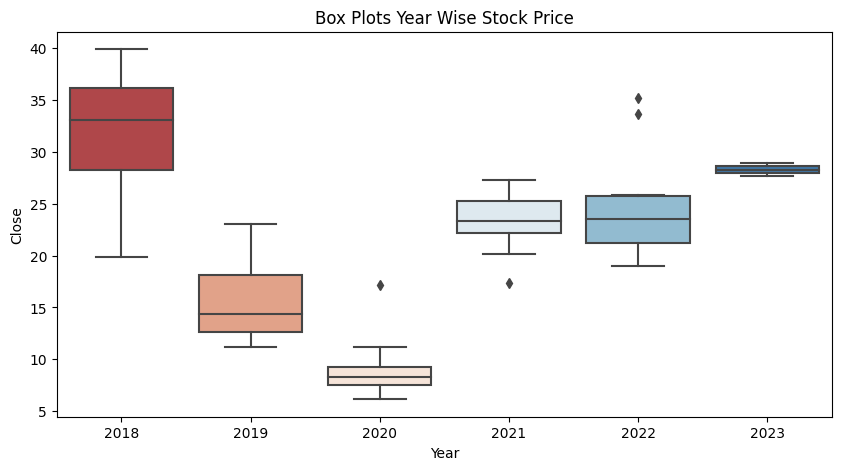

In [13]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

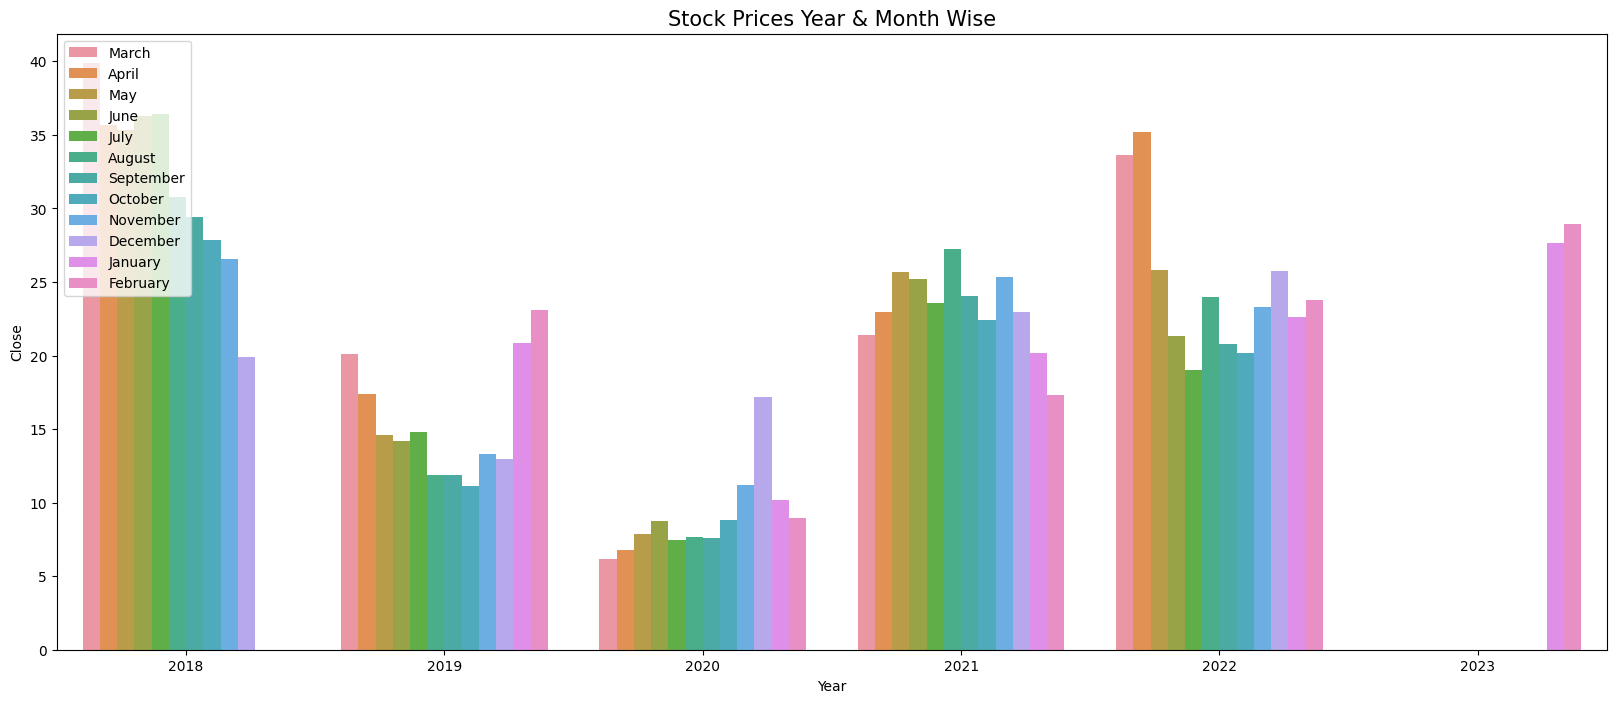

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

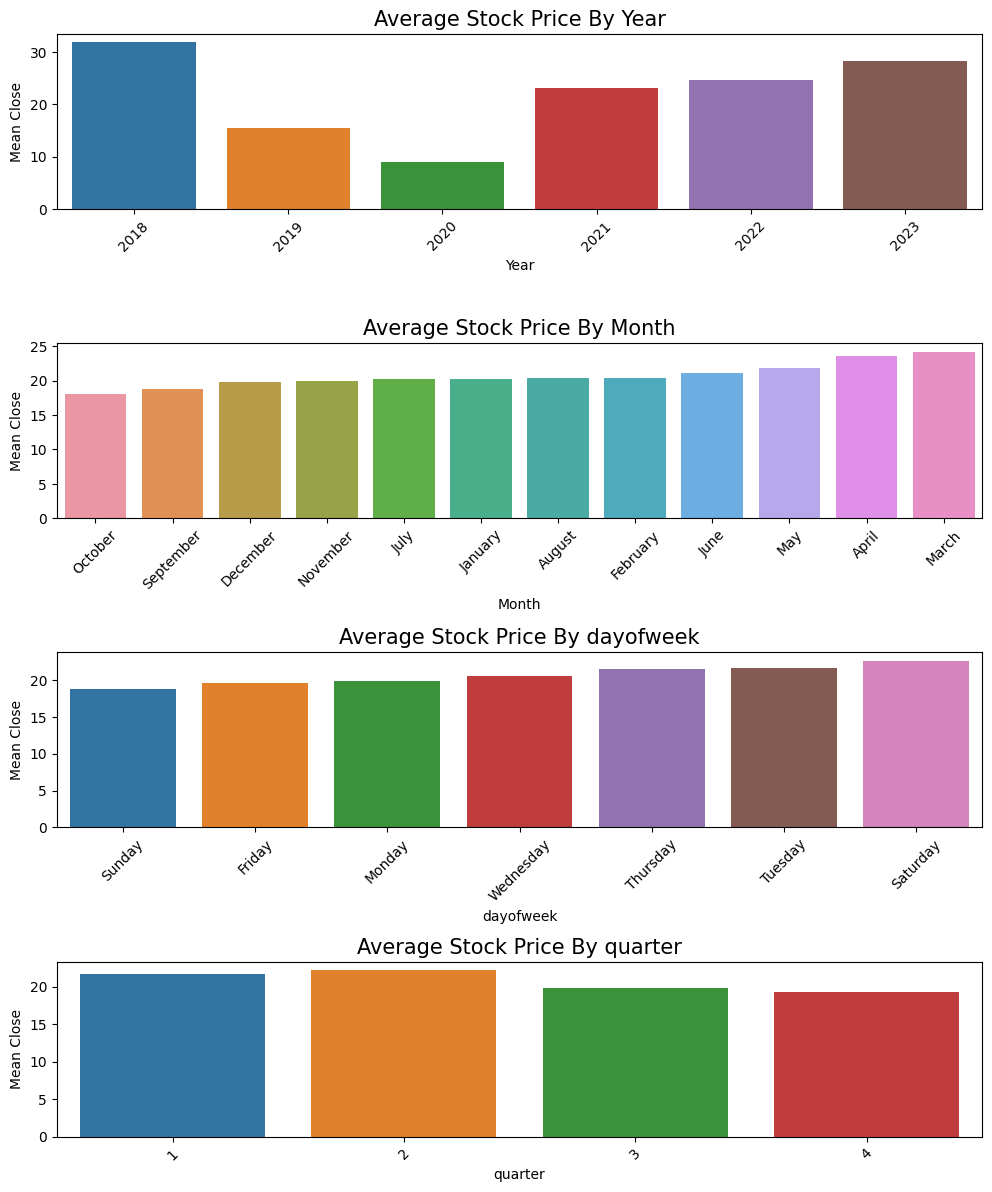

In [15]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [16]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

Close    Volume       30MA     50MA    EMA_0.3
2018-03-01  46.009998  40853400        NaN      NaN  46.009998
2018-03-02  45.389999  21324600        NaN      NaN  45.823999
2018-03-05  44.750000  13108300        NaN      NaN  45.501799
2018-03-06  44.529999  13044100        NaN      NaN  45.210259
2018-03-07  45.689999  18947400        NaN      NaN  45.354181
...               ...       ...        ...      ...        ...
2023-02-22  28.389999   6335000  28.581667  27.3426  28.622404
2023-02-23  28.309999   4881100  28.602333  27.4006  28.528682
2023-02-24  28.270000   5297700  28.626000  27.4498  28.451078
2023-02-27  28.910000   6213700  28.630667  27.5126  28.588754
2023-02-28  30.629999   9773400  28.706667  27.6340  29.201128

[1258 rows x 5 columns]

### Retrieve from FRED Database (US Economics and market data)

In [17]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

S&P500  DowJones  10Y_Treasury_Rate
2018-03-01  2677.67   8135.78               2.81
2018-03-02  2691.25   8117.68               2.86
2018-03-05  2720.94   8206.39               2.88
2018-03-06  2728.12   8213.39               2.88
2018-03-07  2726.80   8183.38               2.89
...             ...       ...                ...
2023-02-23  4012.32  11180.26               3.88
2023-02-24  3970.04  11095.39               3.95
2023-02-27  3982.24  11141.21               3.92
2023-02-28  3970.15  11048.13               3.92
2023-03-01  3951.39  11031.18               4.01

[1249 rows x 3 columns]

In [18]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

Close      Volume       30MA     50MA    EMA_0.3   S&P500  \
2018-03-01  46.009998  40853400.0        NaN      NaN  46.009998  2677.67   
2018-03-02  45.389999  21324600.0        NaN      NaN  45.823999  2691.25   
2018-03-05  44.750000  13108300.0        NaN      NaN  45.501799  2720.94   
2018-03-06  44.529999  13044100.0        NaN      NaN  45.210259  2728.12   
2018-03-07  45.689999  18947400.0        NaN      NaN  45.354181  2726.80   
...               ...         ...        ...      ...        ...      ...   
2023-02-23  28.309999   4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000   5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000   6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999   9773400.0  28.706667  27.6340  29.201128  3970.15   
2023-03-01  30.629999   9773400.0  28.706667  27.6340  29.201128  3951.39   

            DowJones  10Y_Treasury_Rate  
2018-03-01   8135.78               2.81  
2018-03-02   8117.68               2.86  
2018-03-05   8206.39               2.88  
2018-03-06   8213.39               2.88  
2018-03-07   8183.38               2.89  
...              ...                ...  
2023-02-23  11180.26               3.88  
2023-02-24  11095.39               3.95  
2023-02-27  11141.21               3.92  
2023-02-28  11048.13               3.92  
2023-03-01  11031.18               4.01  

[1259 rows x 8 columns]

## TA-Lib Technical Indicators

In [19]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

Close      Volume       30MA     50MA    EMA_0.3   S&P500  \
2018-03-01  46.009998  40853400.0        NaN      NaN  46.009998  2677.67   
2018-03-02  45.389999  21324600.0        NaN      NaN  45.823999  2691.25   
2018-03-05  44.750000  13108300.0        NaN      NaN  45.501799  2720.94   
2018-03-06  44.529999  13044100.0        NaN      NaN  45.210259  2728.12   
2018-03-07  45.689999  18947400.0        NaN      NaN  45.354181  2726.80   
...               ...         ...        ...      ...        ...      ...   
2023-02-23  28.309999   4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000   5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000   6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999   9773400.0  28.706667  27.6340  29.201128  3970.15   
2023-03-01  30.629999   9773400.0  28.706667  27.6340  29.201128  3951.39   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2018-03-01   8135.78               2.81        NaN       NaN          NaN   
2018-03-02   8117.68               2.86        NaN       NaN          NaN   
2018-03-05   8206.39               2.88        NaN       NaN          NaN   
2018-03-06   8213.39               2.88        NaN       NaN          NaN   
2018-03-07   8183.38               2.89        NaN       NaN          NaN   
...              ...                ...        ...       ...          ...   
2023-02-23  11180.26               3.88  49.785672  0.267419     0.446325   
2023-02-24  11095.39               3.95  49.499114  0.218134     0.400687   
2023-02-27  11141.21               3.92  54.055857  0.228089     0.366167   
2023-02-28  11048.13               3.92  63.569626  0.370497     0.367033   
2023-03-01  11031.18               4.01        NaN       NaN          NaN   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2018-03-01             NaN                   NaN                    NaN   
2018-03-02             NaN                   NaN                    NaN   
2018-03-05             NaN                   NaN                    NaN   
2018-03-06             NaN                   NaN                    NaN   
2018-03-07             NaN                   NaN                    NaN   
...                    ...                   ...                    ...   
2023-02-23       -0.178906             30.235631                28.8335   
2023-02-24       -0.182553             30.192295                28.7840   
2023-02-27       -0.138078             30.197249                28.7880   
2023-02-28        0.003464             30.506438                28.9020   
2023-03-01             NaN                   NaN                    NaN   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2018-03-01                   NaN        NaN        NaN        NaN   
2018-03-02                   NaN        NaN        NaN        NaN   
2018-03-05                   NaN        NaN        NaN        NaN   
2018-03-06                   NaN        NaN        NaN        NaN   
2018-03-07                   NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...   
2023-02-23             27.431369  21.760980  27.504695  19.384198   
2023-02-24             27.375705  27.713350  23.428265  18.288694   
2023-02-27             27.378751  45.464523  31.646284  17.692393   
2023-02-28             27.297562  69.879800  47.685891  18.220369   
2023-03-01                   NaN        NaN        NaN        NaN   

             Chaikin_Osc          OBV  
2018-03-01           NaN   40853400.0  
2018-03-02           NaN   19528800.0  
2018-03-05           NaN    6420500.0  
2018-03-06           NaN   -6623600.0  
2018-03-07           NaN   12323800.0  
...                  ...          ...  
2023-02-23  1.082161e+06 -380951900.0  
2023-02-24  2.444088e+06 -386249600.0  
2023-02-27  2.841482e+06 -380035900.0  
2023-02-28  5.127644e+06 -370262500.

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1259 non-null   float64
 1   Volume                 1259 non-null   float64
 2   30MA                   1230 non-null   float64
 3   50MA                   1210 non-null   float64
 4   EMA_0.3                1259 non-null   float64
 5   S&P500                 1259 non-null   float64
 6   DowJones               1259 non-null   float64
 7   10Y_Treasury_Rate      1259 non-null   float64
 8   RSI                    1244 non-null   float64
 9   MACD                   1225 non-null   float64
 10  MACD_Signal            1225 non-null   float64
 11  MACD_Histogram         1225 non-null   float64
 12  Upper_Bollinger_Band   1239 non-null   float64
 13  Middle_Bollinger_Band  1239 non-null   float64
 14  Lower_Bollinger_Band   1239 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [21]:
filtered_data = combined_data[49:-1]
filtered_data

Close     Volume       30MA     50MA    EMA_0.3   S&P500  \
2018-05-10  35.900002  7940000.0  35.223000  37.1814  34.850408  2723.07   
2018-05-11  35.759998  7046200.0  35.242000  36.9764  35.123285  2727.72   
2018-05-14  36.299999  7895900.0  35.311333  36.7946  35.476300  2730.13   
2018-05-15  35.860001  6200300.0  35.340000  36.6168  35.591410  2711.45   
2018-05-16  37.509998  9989100.0  35.424000  36.4764  36.166986  2722.46   
...               ...        ...        ...      ...        ...      ...   
2023-02-22  28.389999  6335000.0  28.581667  27.3426  28.622404  3991.05   
2023-02-23  28.309999  4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000  5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000  6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999  9773400.0  28.706667  27.6340  29.201128  3970.15   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2018-05-10   8253.22               2.97  50.769627 -0.836998    -1.180530   
2018-05-11   8297.16               2.97  50.173159 -0.693111    -1.083046   
2018-05-14   8294.47               3.00  52.491594 -0.529403    -0.972318   
2018-05-15   8236.00               3.08  50.432466 -0.430209    -0.863896   
2018-05-16   8256.76               3.09  57.211088 -0.215966    -0.734310   
...              ...                ...        ...       ...          ...   
2023-02-22  11134.50               3.93  50.326764  0.322361     0.491052   
2023-02-23  11180.26               3.88  49.785672  0.267419     0.446325   
2023-02-24  11095.39               3.95  49.499114  0.218134     0.400687   
2023-02-27  11141.21               3.92  54.055857  0.228089     0.366167   
2023-02-28  11048.13               3.92  63.569626  0.370497     0.367033   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2018-05-10        0.343532             38.751244                35.2450   
2018-05-11        0.389935             38.769212                35.2575   
2018-05-14        0.442914             38.820243                35.2850   
2018-05-15        0.433687             38.771473                35.2600   
2018-05-16        0.518344             38.773251                35.2605   
...                    ...                   ...                    ...   
2023-02-22       -0.168690             30.239251                28.8575   
2023-02-23       -0.178906             30.235631                28.8335   
2023-02-24       -0.182553             30.192295                28.7840   
2023-02-27       -0.138078             30.197249                28.7880   
2023-02-28        0.003464             30.506438                28.9020   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2018-05-10             31.738756  82.189491  83.624561  26.389820   
2018-05-11             31.745788  75.951159  80.185508  24.641713   
2018-05-14             31.749757  76.815258  78.318636  23.018471   
2018-05-15             31.748527  69.021021  73.929146  21.730030   
2018-05-16             31.747749  78.140243  74.658841  21.042471   
...                          ...        ...        ...        ...   
2023-02-22             27.475750  20.810466  42.051684  20.761793   
2023-02-23             27.431369  21.760980  27.504695  19.384198   
2023-02-24             27.375705  27.713350  23.428265  18.288694   
2023-02-27             27.378751  45.464523  31.646284  17.692393   
2023-02-28             27.297562  69.879800  47.685891  18.220369   

             Chaikin_Osc          OBV  
2018-05-10 -2.471335e+06  -98203800.0  
2018-05-11 -3.343429e+06 -105250000.0  
2018-05-14 -2.107883e+06  -97354100.0  
2018-05-15 -1.285937e+06 -103554400.0  
2018-05-16  1.304694e+06  -93565300.0  
...                  ...          ...  
2023-02-22  1.270731e+06 -376070800.0  
2023-02-23  1.082161e+06 -380951900.0  
2023-02-24  2.444088e+06 -386249600.0  
2023-02-27  2.841482e+06 -380035900.0  
2023-02-

In [22]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1209 entries, 2018-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1209 non-null   float64
 1   Volume                 1209 non-null   float64
 2   30MA                   1209 non-null   float64
 3   50MA                   1209 non-null   float64
 4   EMA_0.3                1209 non-null   float64
 5   S&P500                 1209 non-null   float64
 6   DowJones               1209 non-null   float64
 7   10Y_Treasury_Rate      1209 non-null   float64
 8   RSI                    1209 non-null   float64
 9   MACD                   1209 non-null   float64
 10  MACD_Signal            1209 non-null   float64
 11  MACD_Histogram         1209 non-null   float64
 12  Upper_Bollinger_Band   1209 non-null   float64
 13  Middle_Bollinger_Band  1209 non-null   float64
 14  Lower_Bollinger_Band   1209 non-null  

In [23]:
filtered_data.describe().applymap("{0:.5f}".format).T

count              mean              std  \
Close                  1209.00000          20.06002          8.31909   
Volume                 1209.00000    14113955.50041    8017276.56808   
30MA                   1209.00000          20.13342          8.23764   
50MA                   1209.00000          20.20475          8.21027   
EMA_0.3                1209.00000          20.07005          8.28555   
S&P500                 1209.00000        3522.61630        656.15232   
DowJones               1209.00000        9833.69748       1397.26438   
10Y_Treasury_Rate      1209.00000           2.06360          0.94989   
RSI                    1209.00000          48.72851         12.88624   
MACD                   1209.00000          -0.04672          0.89736   
MACD_Signal            1209.00000          -0.05212          0.84647   
MACD_Histogram         1209.00000           0.00540          0.27282   
Upper_Bollinger_Band   1209.00000          22.57039          8.98497   
Middle_Bollinger_Band  1209.00000          20.10533          8.26257   
Lower_Bollinger_Band   1209.00000          17.64026          7.73057   
Stoch_K                1209.00000          48.48668         25.62183   
Stoch_D                1209.00000          48.50484         23.91734   
ADX                    1209.00000          24.88709          9.84316   
Chaikin_Osc            1209.00000    -2255960.50396   11453965.31003   
OBV                    1209.00000  -384018989.57816  154348179.98523   

                                    min               25%               50%  \
Close                           4.90000          13.08000          20.88000   
Volume                    3316900.00000     8565600.00000    12151300.00000   
30MA                            6.05833          12.88333          21.47100   
50MA                            6.64300          12.75300          21.42180   
EMA_0.3                         5.37812          12.97597          21.17784   
S&P500                       2237.40000        2900.51000        3419.45000   
DowJones                     6100.31000        8625.97000        9573.56000   
10Y_Treasury_Rate               0.52000           1.37000           1.84000   
RSI                            15.41643          39.70814          49.64641   
MACD                           -2.65897          -0.60288          -0.04488   
MACD_Signal                    -2.36368          -0.57892          -0.06007   
MACD_Histogram                 -0.91245          -0.15283           0.02238   
Upper_Bollinger_Band            6.66179          14.46620          24.37483   
Middle_Bollinger_Band           5.76350          12.99000          21.41800   
Lower_Bollinger_Band            4.07842          10.30514          17.98681   
Stoch_K                         0.30973          26.10725          49.03195   
Stoch_D                         4.23081          27.54095          48.67688   
ADX                             8.96766          17.48106          22.96886   
Chaikin_Osc             -40951576.56806    -8382319.43883    -1079254.98849   
OBV                    -732825600.00000  -474087200.00000  -389910800.00000   

                                    75%              max  
Close                          25.69000         38.45000  
Volume                   17339000.00000   80060000.00000  
30MA                           25.27467         36.45367  
50MA                           25.03840         37.18140  
EMA_0.3                        25.47408         37.56390  
S&P500                       4115.77000       4796.56000  
DowJones                    11284.87000      12360.33000  
10Y_Treasury_Rate               2.87000          4.25000  
RSI                            58.05230         87.15005  
MACD                            0.45962          3.05588  
MACD_Signal                     0.44770          2.78766  
MACD_Histogram                  0.17793          0.77041  
Upper_Bollinger_Band           28.44275         40.77745  
Middle_Bollinger_Band        

<AxesSubplot:>

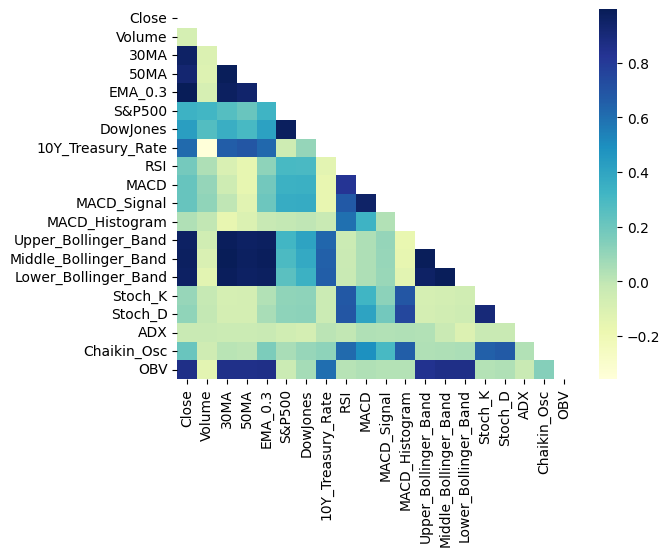

In [24]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(1209, 19)
(1209, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.39, 0.24, 0.13, 0.07, 0.05, 0.04, 0.02, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(846, 19)
(846, 1)
(363, 19)
(363, 1)


In [28]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

0.4350805455198976

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [29]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:22<00:00,  1.91it/s]


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoLarsCV                                  0.99       0.99  0.42        0.04
LassoLarsIC                                  0.99       0.99  0.43        0.02
TransformedTargetRegressor                   0.99       0.99  0.43        0.02
RANSACRegressor                              0.99       0.99  0.43        0.02
LinearRegression                             0.99       0.99  0.43        0.02
BayesianRidge                                0.99       0.99  0.43        0.01
RidgeCV                                      0.99       0.99  0.43        0.01
HuberRegressor                               0.99       0.99  0.44        0.07
Ridge                                        0.99       0.99  0.45        0.02
LinearSVR                                    0.99       0.99  0.46        0.05
LassoCV                                      0.99       0.99  0.50        0.08
ElasticNetCV                                 0.99       0.99  0.51        0.08
OrthogonalMatchingPursuitCV                  0.99       0.99  0.53        0.02
SGDRegressor                                 0.99       0.99  0.54        0.02
LarsCV                                       0.99       0.99  0.55        0.03
GradientBoostingRegressor                    0.98       0.98  0.67        0.44
PassiveAggressiveRegressor                   0.98       0.98  0.69        0.01
HistGradientBoostingRegressor                0.97       0.97  0.78        0.73
LGBMRegressor                                0.96       0.97  0.86        0.12
RandomForestRegressor                        0.96       0.96  0.88        0.86
OrthogonalMatchingPursuit                    0.96       0.96  0.91        0.01
BaggingRegressor                             0.95       0.96  0.96        0.11
XGBRegressor                                 0.95       0.96  0.98        0.17
AdaBoostRegressor                            0.94       0.95  1.09        0.22
DecisionTreeRegressor                        0.93       0.94  1.17        0.02
ExtraTreesRegressor                          0.93       0.93  1.22        0.47
TweedieRegressor                             0.93       0.93  1.23        0.02
Lasso                                        0.91       0.91  1.37        0.01
ExtraTreeRegressor                           0.88       0.89  1.56        0.02
Lars                                         0.87       0.88  1.62        0.01
ElasticNet                                   0.79       0.81  2.04        0.01
GammaRegressor                               0.76       0.78  2.19        0.02
KNeighborsRegressor                          0.47       0.50  3.27        0.02
MLPRegressor                                 0.39       0.42  3.52        1.01
NuSVR                                        0.24       0.28  3.94        0.07
SVR                                          0.23       0.27  3.96        0.08
PoissonRegressor                            -0.78      -0.69  6.02        0.02
LassoLars                                   -2.31      -2.14  8.21        0.01
DummyRegressor                              -2.31      -2.14  8.21        0.01
QuantileRegressor                           -3.29      -3.06  9.34       16.88
KernelRidge                                -15.08     -14.24 18.08        0.03
GaussianProcessRegressor                   -24.62     -23.27 22.82        0.11

# Regression & ensemble learning

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [33]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 0.488380 0.088737 0.282126 0.435081
LASSO: 2.729162 2.602537 1.158905 1.350647
RIDGE: 0.416501 0.103491 0.289146 0.447161
EN: 2.934997 2.391278 1.437509 2.238878
KNR: 5.080809 2.101494 0.477227 3.100654
CART: 3.098318 1.759556 0.000000 1.064801
SVR: 4.463439 2.331583 0.578580 3.570498
RFR: 3.232101 2.533230 0.155281 0.870575
BR: 3.219086 2.407577 0.183425 0.945161
ABR: 3.308687 2.137592 0.679441 1.106802
GBR: 3.215974 2.262966 0.181325 0.662720
ETR: 3.389243 2.173417 0.000000 1.285148
XGB: 2.996605 1.628265 0.013032 0.982438
LGBM: 3.535357 2.513049 0.099518 0.852591
CBR: 4.792329 2.509091 0.064077 2.320341
MLP: 8.314823 2.991347 1.411775 5.252730


In [34]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

CV_mean  CV_std  Train_RMSE  Test_RMSE
Names                                        
LR        0.49    0.09        0.28       0.44
LASSO     2.73    2.60        1.16       1.35
RIDGE     0.42    0.10        0.29       0.45
EN        2.93    2.39        1.44       2.24
KNR       5.08    2.10        0.48       3.10
CART      3.10    1.76        0.00       1.06
SVR       4.46    2.33        0.58       3.57
RFR       3.23    2.53        0.16       0.87
BR        3.22    2.41        0.18       0.95
ABR       3.31    2.14        0.68       1.11
GBR       3.22    2.26        0.18       0.66
ETR       3.39    2.17        0.00       1.29
XGB       3.00    1.63        0.01       0.98
LGBM      3.54    2.51        0.10       0.85
CBR       4.79    2.51        0.06       2.32
MLP       8.31    2.99        1.41       5.25

#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

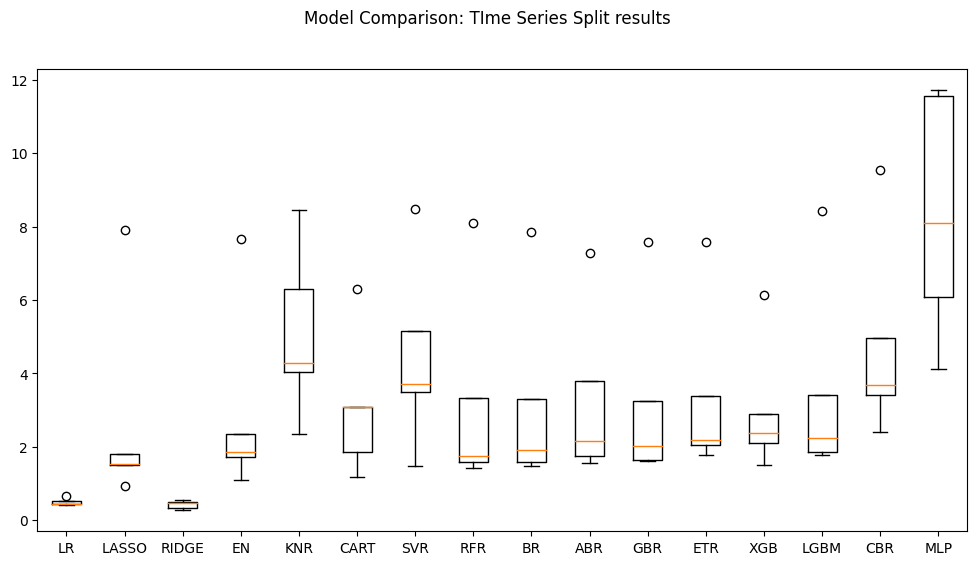

In [35]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [36]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

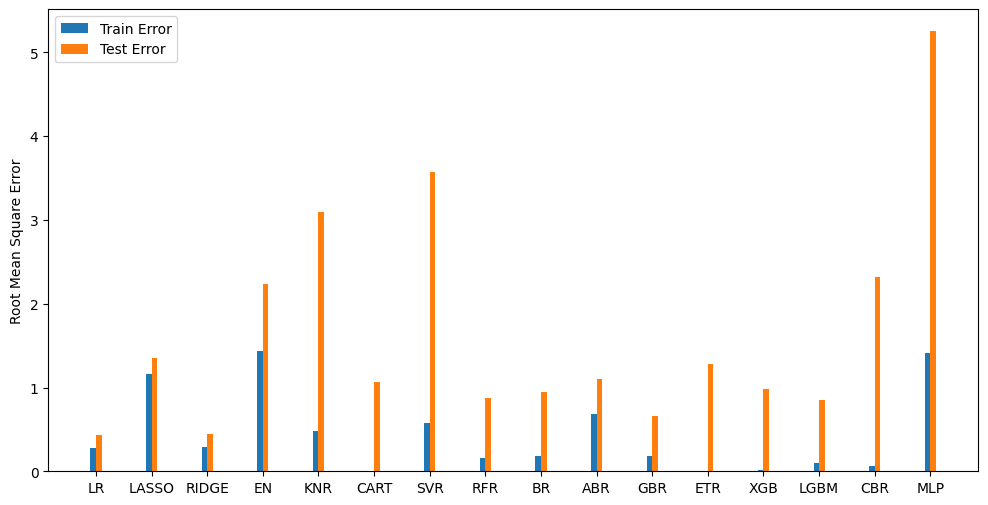

In [37]:
plot_models_RMSE()

# ARIMA

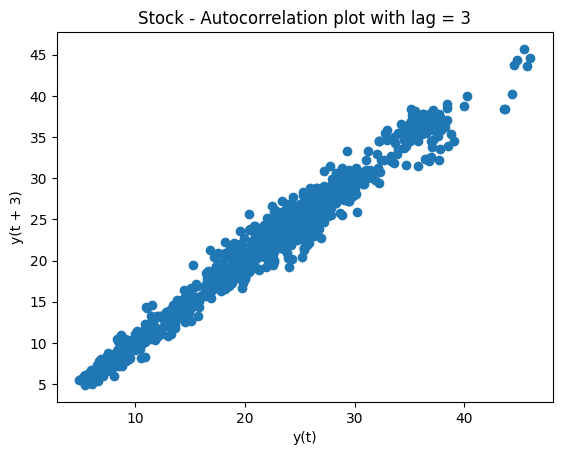

In [38]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [40]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-1.8992568442986857, 0.33241079534821155, 1, 1207, {'1%': -3.43577938005948, '5%': -2.863937543790164, '10%': -2.568046493171221}, 2619.6979352340954) 

ADF Statistic: -1.8992568442986857
n_lags: 0.33241079534821155
p-value: 0.33241079534821155
Critial Values:
   1%, -3.43577938005948
Critial Values:
   5%, -2.863937543790164
Critial Values:
   10%, -2.568046493171221
	1%: -3.436
	5%: -2.864
	10%: -2.568

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

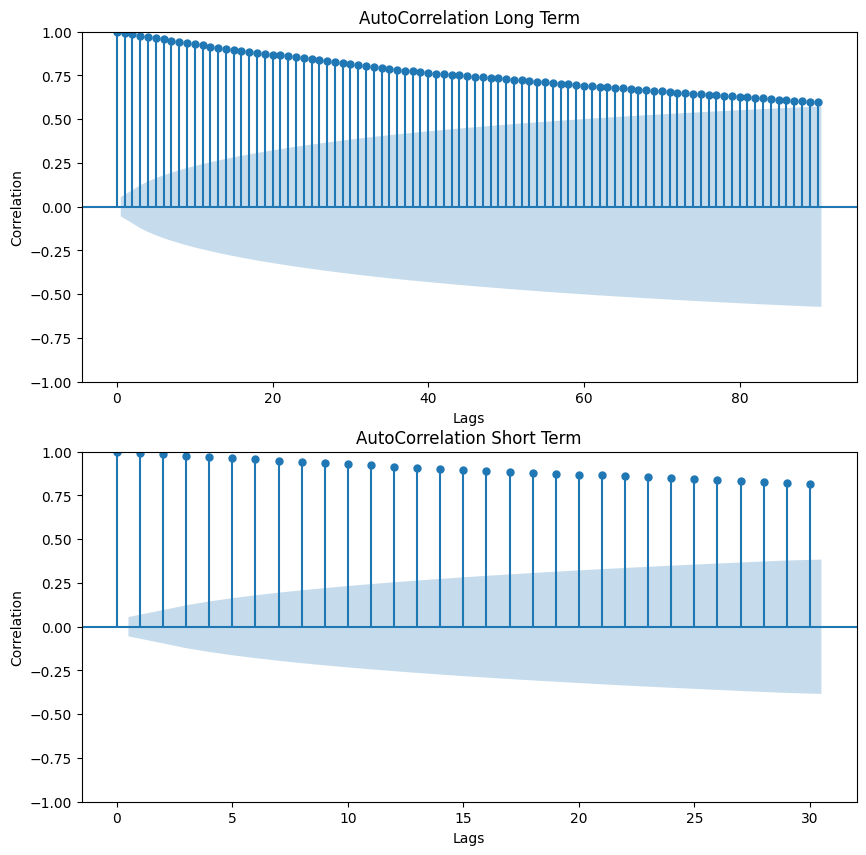

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

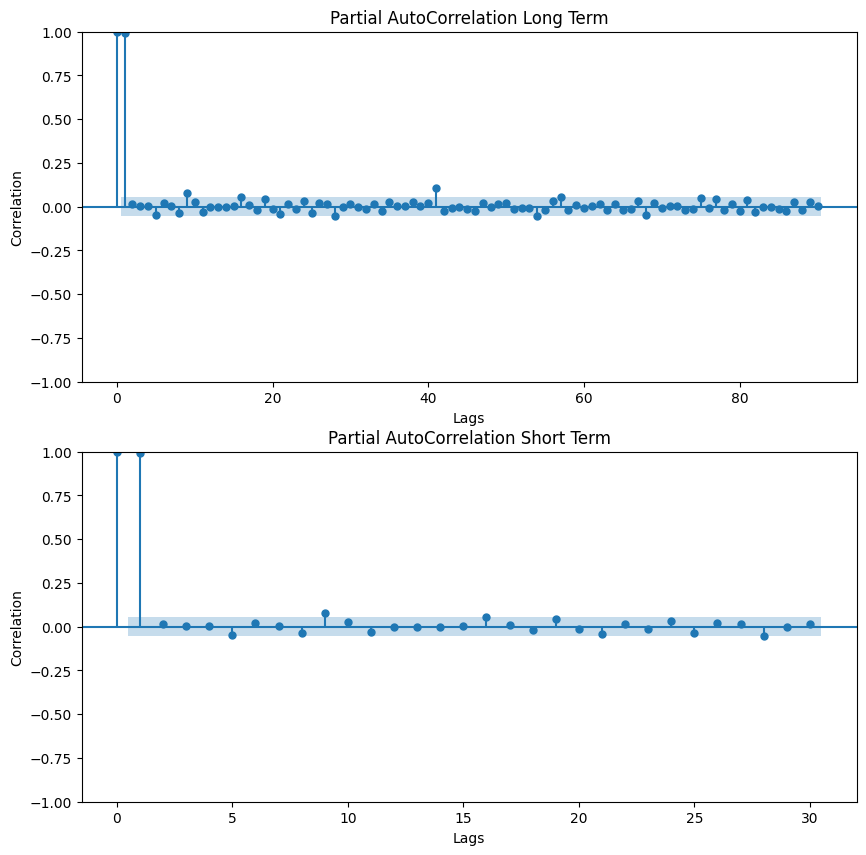

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

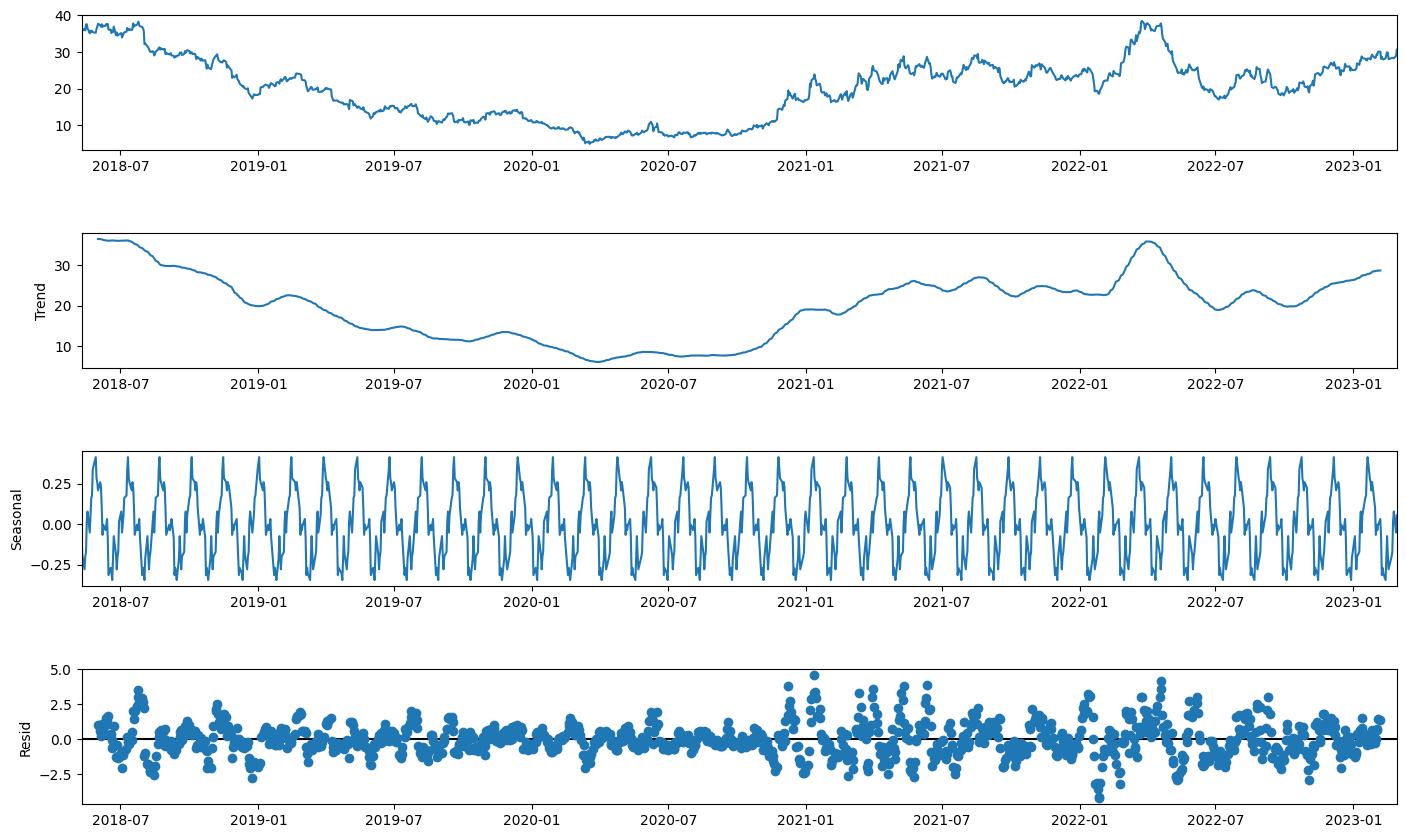

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [44]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 8.70807 | Test RMSE: 8.20739
Model (0, 0, 1) | Train RMSE: 4.64544 | Test RMSE: 7.91171
Model (0, 0, 2) | Train RMSE: 2.88570 | Test RMSE: 8.56031
Model (0, 1, 0) | Train RMSE: 1.40782 | Test RMSE: 10.14225
Model (0, 1, 1) | Train RMSE: 1.40781 | Test RMSE: 10.14181
Model (0, 1, 2) | Train RMSE: 1.40776 | Test RMSE: 10.14257
Model (0, 2, 0) | Train RMSE: 1.68255 | Test RMSE: 10.32269
Model (0, 2, 1) | Train RMSE: 1.54031 | Test RMSE: 10.29590
Model (0, 2, 2) | Train RMSE: 1.54028 | Test RMSE: 10.29581
Model (1, 0, 0) | Train RMSE: 0.79326 | Test RMSE: 10.06002
Model (1, 0, 1) | Train RMSE: 0.79270 | Test RMSE: 10.05968
Model (1, 0, 2) | Train RMSE: 0.79482 | Test RMSE: 10.06015
Model (1, 1, 0) | Train RMSE: 1.40781 | Test RMSE: 10.14180
Model (1, 1, 1) | Train RMSE: 1.40762 | Test RMSE: 10.14151
Model (1, 1, 2) | Train RMSE: 1.40750 | Test RMSE: 10.14283
Model (1, 2, 0) | Train RMSE: 1.60899 | Test RMSE: 10.31001
Model (1, 2, 1) | Train RMSE: 1.54028 | Tes

In [47]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 8.70807 | Test RMSE: 8.20739
Model (0, 0, 1) | Train RMSE: 4.64544 | Test RMSE: 8.18989
Model (0, 0, 2) | Train RMSE: 2.88570 | Test RMSE: 8.18612
Model (0, 1, 0) | Train RMSE: 1.40782 | Test RMSE: 4.85174
Model (0, 1, 1) | Train RMSE: 1.40781 | Test RMSE: 4.84628
Model (0, 1, 2) | Train RMSE: 1.40776 | Test RMSE: 4.85801
Model (0, 2, 0) | Train RMSE: 1.68255 | Test RMSE: 427.65480
Model (0, 2, 1) | Train RMSE: 1.54031 | Test RMSE: 5.45538
Model (0, 2, 2) | Train RMSE: 1.54028 | Test RMSE: 5.51236
Model (1, 0, 0) | Train RMSE: 0.79326 | Test RMSE: 4.80491
Model (1, 0, 1) | Train RMSE: 0.79270 | Test RMSE: 4.79973
Model (1, 0, 2) | Train RMSE: 0.79482 | Test RMSE: 4.81719
Model (1, 1, 0) | Train RMSE: 1.40781 | Test RMSE: 4.84615
Model (1, 1, 1) | Train RMSE: 1.40762 | Test RMSE: 4.84831
Model (1, 1, 2) | Train RMSE: 1.40750 | Test RMSE: 4.86955
Model (1, 2, 0) | Train RMSE: 1.60899 | Test RMSE: 302.79562
Model (1, 2, 1) | Train RMSE: 1.54028 | Test RMSE: 5

In [48]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

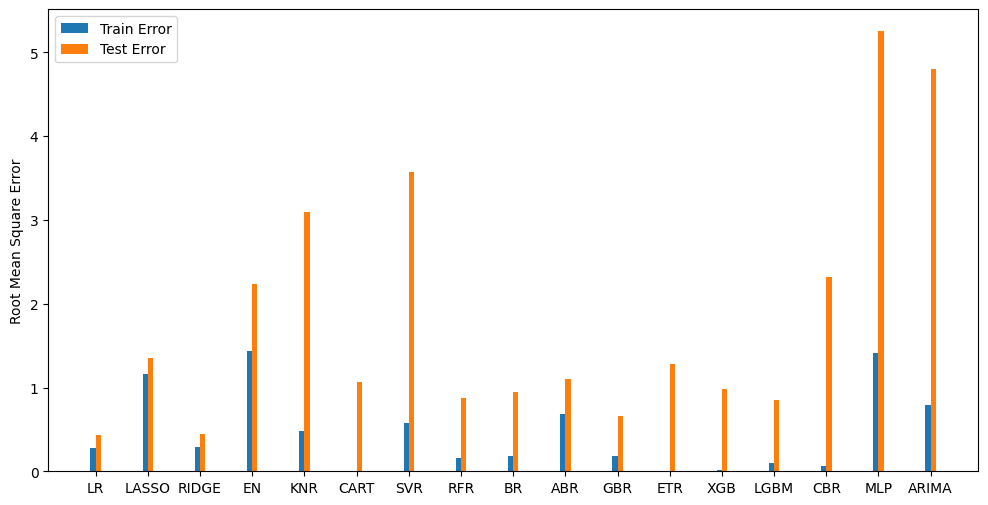

In [49]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [50]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  846
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -872.713
Date:                Tue, 28 Mar 2023   AIC                           1755.426
Time:                        18:39:40   BIC                           1779.129
Sample:                             0   HQIC                          1764.508
                                - 846                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9080      6.332      3.776      0.000      11.497      36.319
ar.L1          0.2558      0.432      0.592      0.554      -0.591       1.103
ar.L2          0.7403      0.431      1.717      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1743.756, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1745.675, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1745.678, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1742.161, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1746.695, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.625 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  846
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -870.080
Date:                Tue, 28 Mar 2023   AIC                           1742.161
Time:                        18:39:41   BIC                           1746.900
Sample:                             0   HQIC                          1743.977
                                - 846                                       

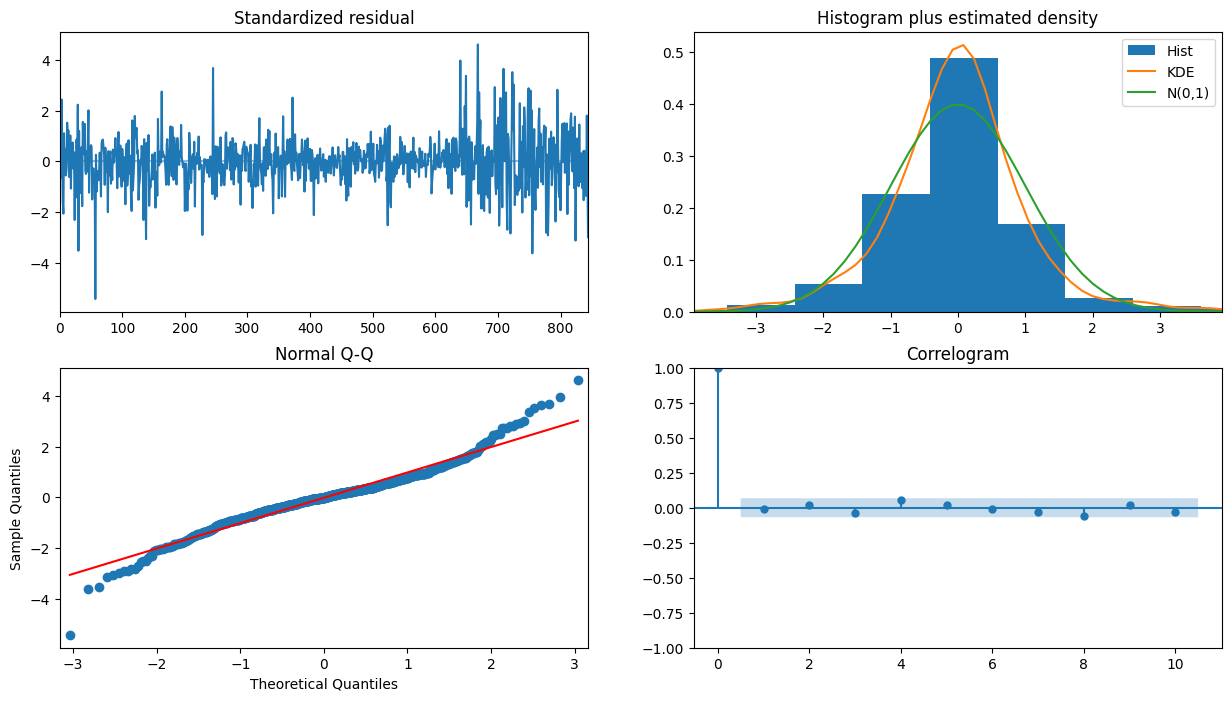

In [51]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [52]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(880, 1)
(378, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [54]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (869, 10)
trainY.shape =  (869,)
testX.shape =  (367, 10)
testY.shape =  (367,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [55]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([869, 10, 1])
trainY.shape =  torch.Size([869, 1])
testX.shape =  torch.Size([367, 10, 1])
testY.shape =  torch.Size([367, 1])


In [56]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [57]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [58]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [59]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.1376
Epoch: 20/100, Loss: 0.0903
Epoch: 30/100, Loss: 0.0571
Epoch: 40/100, Loss: 0.0453
Epoch: 50/100, Loss: 0.0385
Epoch: 60/100, Loss: 0.0348
Epoch: 70/100, Loss: 0.0331
Epoch: 80/100, Loss: 0.0318
Epoch: 90/100, Loss: 0.0340
Epoch: 100/100, Loss: 0.0299


In [60]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

      0
0 34.50
1 35.30
2 34.83
3 34.55
4 34.67
      0
0 35.09
1 35.38
2 35.05
3 34.51
4 34.38

LSTM Train RMSE: 0.6402888


#### Plotting the error loss of all epochs

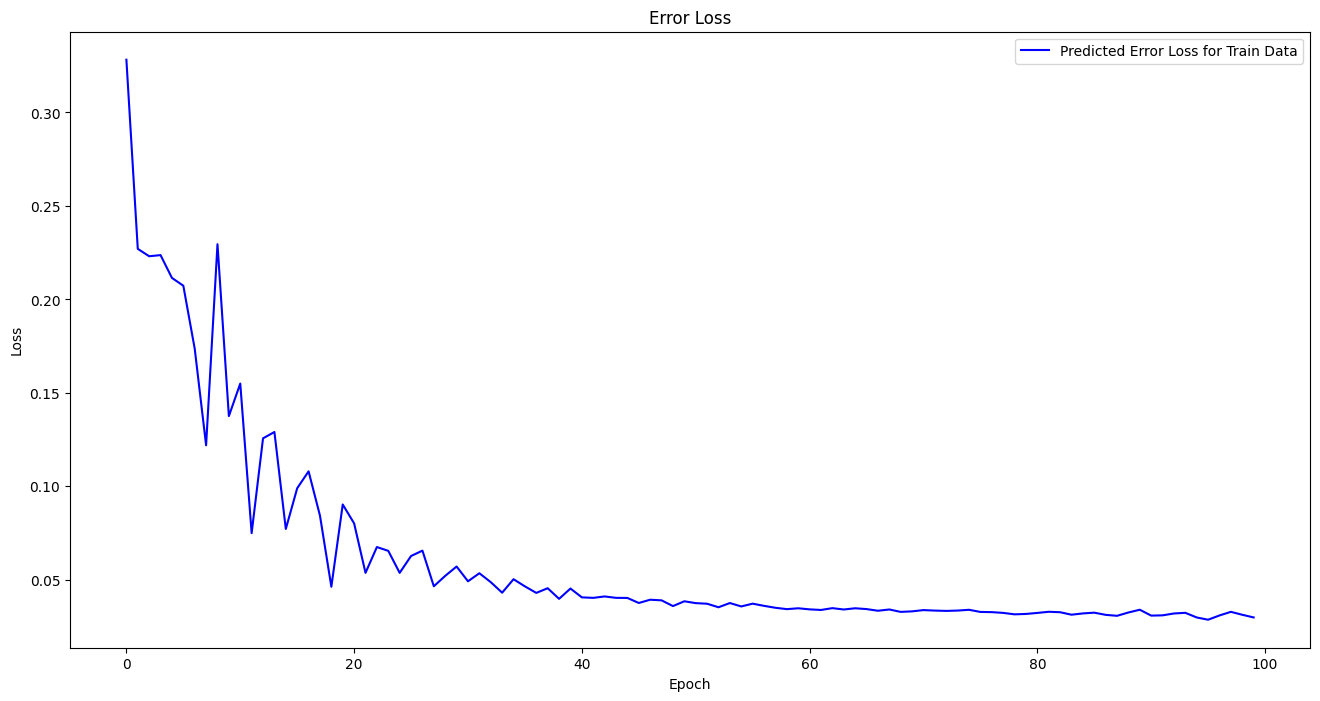

In [61]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

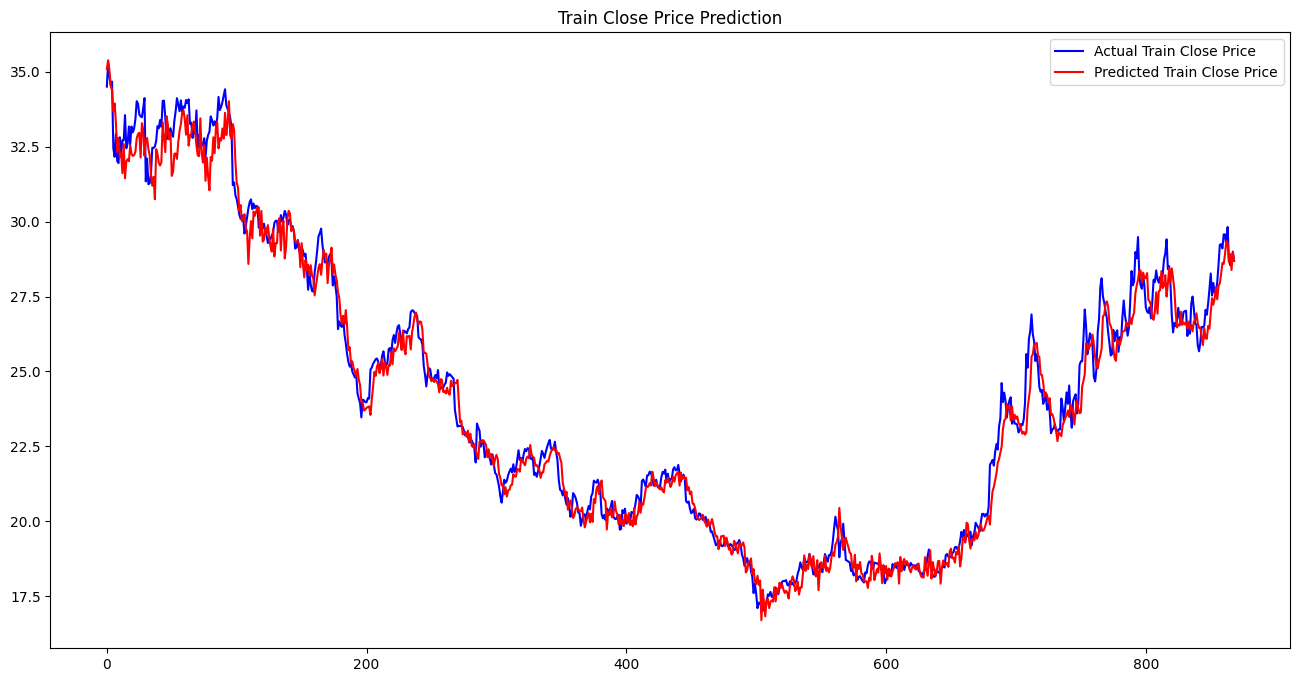

In [62]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [63]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

      0
0 25.38
1 24.45
2 25.67
3 25.39
4 23.36
      0
0 26.04
1 25.87
2 25.56
3 25.41
4 25.36

0.6402888


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [64]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

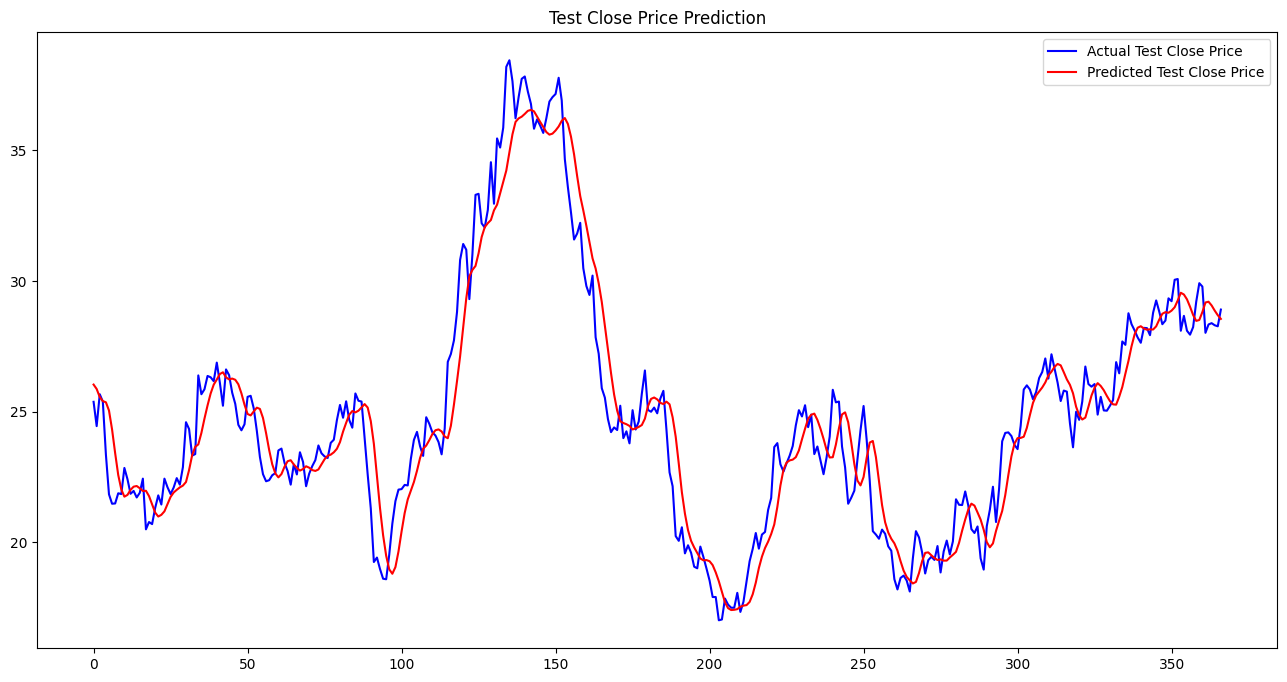

In [65]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [66]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

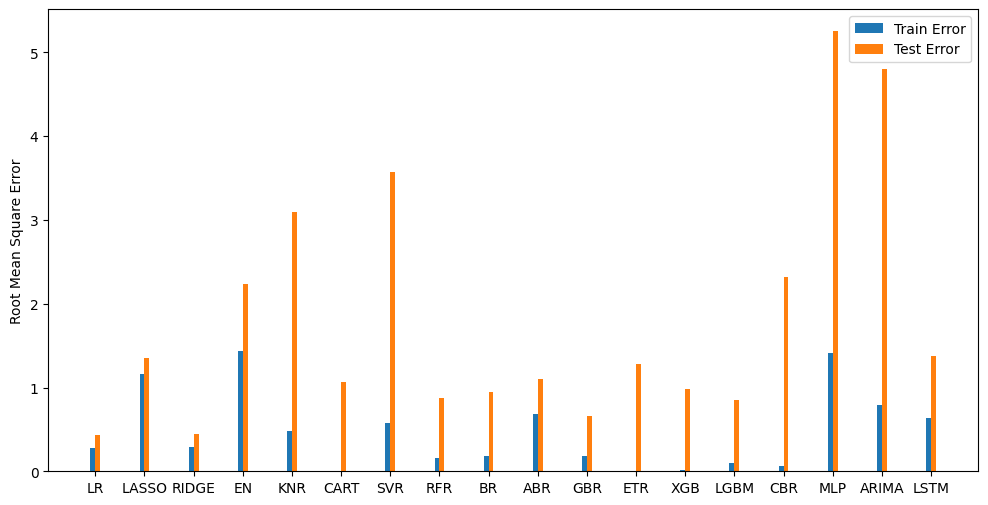

In [67]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.